1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import random

%matplotlib inline

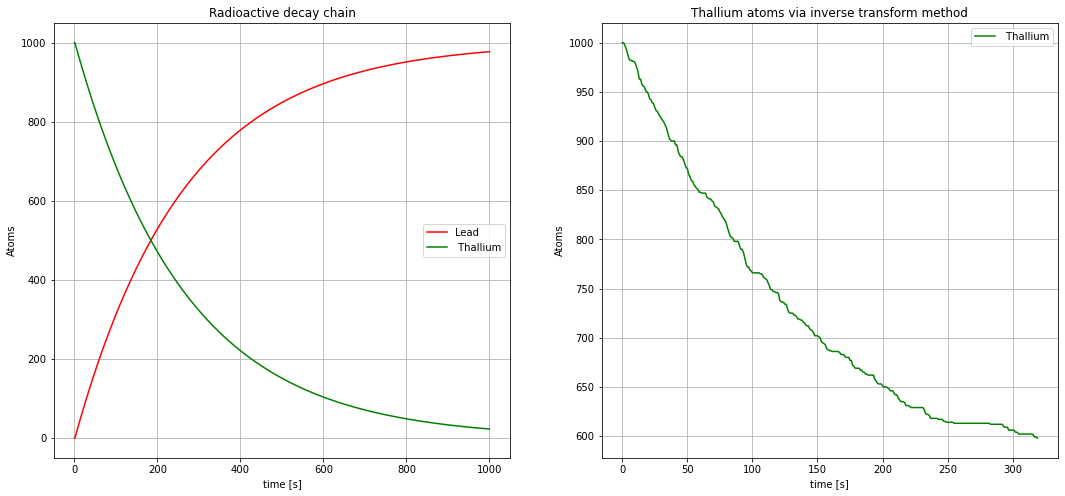

In [2]:
def p_TI(t,tau=(3.052*60)):
    return 1-2**(-t/(tau))

def icdf_2(y, tau=(3.052*60)): #inverse transform method
    return -tau*np.log2(1-y)

TI=1000
LE=0
time=np.arange(0, 1000, 1)
TI_time=[]
LE_time=[]
TI_time.append(TI)
LE_time.append(LE)
for t in time:
    neur=p_TI(t)*TI
    TI_time.append(TI-neur)
    LE_time.append(LE+neur) 
    

time1=np.arange(0, 1001, 1)

fig, ax = plt.subplots(1,2,figsize=(18,8))
ax[0].plot(time1,LE_time,color='red',label='Lead')
ax[0].plot(time1,TI_time,color='green',label=' Thallium')
ax[0].legend()
ax[0].set_title('Radioactive decay chain')
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('Atoms')
ax[0].grid()



## Second step


time= icdf_2(np.random.random(1000))
time = np.sort(time)
count= np.zeros((1000))

i=0 
k=0
for t in time:
    if t <= i: 
        count[i] += 1
    else: 
        i += 1

for j in range(len(count)):
    x = np.sum(count[:j])
    if x == np.sum(count): 
        break
    k += 1
        
t = np.arange(0, len(count[:k]))
remaining_TI = 1000 - np.cumsum(count[:k])

ax[1].plot(t, remaining_TI, color = 'green',label=' Thallium')
ax[1].set_title('Thallium atoms via inverse transform method')
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('Atoms')
ax[1].legend()
ax[1].grid()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

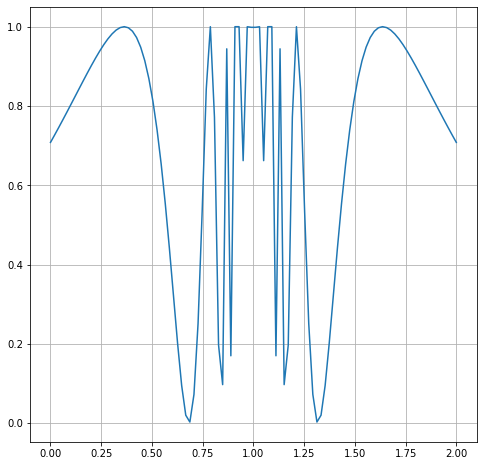

Hit/miss method
Integral: 1.34904 with error: 0.0029633951447621694
Mean value method:
Integral: 1.34653706328624 with  error: 0.002070587887552634
The ratio between the error with hit/miss method and with mean value method is equal to: 0.6987214955833408
The error in the mean value method is around 2/3 of the error with the first method


In [3]:
def f(x):
    return pow(np.sin(1/(1-x)),2)
a=0
b=2
x = np.linspace(b, a, 100)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x,f(x))
ax.grid()
plt.show()


print("Hit/miss method")
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() 
    y = np.random.random()   
    if y < f(x): count += 1
I = 2 * count / N

p=count/N   
err = (b-a)*np.sqrt(N*p*(1-p))/N
print("Integral:", I,"with error:",err)

print("Mean value method:")
x_random = np.array([(np.random.uniform(a, b)) for i in range(N)])
sum_f=sum(f(x_random)) # sum of f(x)
I_mean = ((b-a)*sum_f)/N

f1=(sum(f(x_random)**2))/(N)
f2=(sum_f)/(N)

err_mean=(b-a)*np.sqrt((f1-f2**2)/N)
print("Integral:",I_mean,"with  error:",err_mean)

ratio_err = err_mean/err #ratio between the two errors

print("The ratio between the error with hit/miss method and with mean value method is equal to:",ratio_err)
print("The error in the mean value method is around 2/3 of the error with the first method")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
def f(x,V):
    if sum([ x[i]**2 for i in range(V)])<=1:
        return 1
    else:
        return 0
def comV(V):
    a=-1
    b=1
    N=100000
    #case with V=2
    sum_f=0
    for i in range(N):
        x_random = np.array([np.random.uniform(a, b) for i in range(V)])
        sum_f+=f(x_random,V)
    return ((2**V)*sum_f)/N
    

print("Area of circle with dim=2 is equal to",comV(V=2))
print("Area of circle with dim=10 is equal to",comV(V=10))

Area of circle with dim=2 is equal to 3.1516
Area of circle with dim=10 is equal to 2.51904


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [5]:
def f(x):
    return (x**(-0.5))/(np.exp(x)+1)
def w(x):
    return 1/(np.sqrt(x))

a=0
b=1
N=100000

int_w=2*(np.sqrt(b)-np.sqrt(a)) #integral of w(x)
x_random = np.array([np.random.uniform(a, b)**2 for i in range(N)]) 
sum_g=sum(f(x_random)/w(x_random)) #sum of the ratio between f(x) and w(x)
I=(sum_g*int_w)/N  # integral 
print("The value of the integral is:",I,"True value is around 0.84")

The value of the integral is: 0.8384581030259871 True value is around 0.84
